# Redes Neuronales - Modelo Bicapa


In [19]:
import pandas as pd
from IPython import display
import numpy as np

## Fundamento matemático del perceptrón simple bicapa

{cite:p}`rosenblatt1958perceptron` introdujo el __perceptrón simple__ formado por dos capas, una de __entrada con n neuronas__ y una de __salida con m neuronas__. {cite:p}`widrow1960adaptive` introdujeron el modelo __ADAptative LInear Neuron (Adaline)__ tambien bicapa. Los modelos bicapa tienen la siguiente forma 

Dada __1 observación__ $\bar{x}=(x_1,...,x_j, ..., x_n)$ de la que se conoce su __clase__ en formato _one-hote_ $\bar{y}=(y_1,...,y_i, ...y_m)$ 

Primero se efectua una __ponderación lineal__ $\bar{z}=(z_1,...,z_i, ..., z_m)$ de la que se obtiene la __salida__ $\bar{a}$ aplicando una __función de activación__: 

$$\bar{a}=f(\bar{z})=(a_1,...,a_i, ..., a_m)$$

Se puede decir que existen $n$ __neuronas de entrada__ y $m$ __neuronas de salida__. La ponderación lineal en las neuronas de salida a partir de los pesos se calcula:

$$z_i = b_i + \displaystyle\sum_{j=1}^n w_{ij}x_j \quad (i=1...m)$$

Hacen falta $m \times n$ pesos y $m$ bias para definir la red, que se en forma matricialmente son:

$$ W = \begin{bmatrix}{w_{11}}&{w_{12}}&{...}&{w_{1n}}\\{w_{21}}&{w_{22}}&{...}&{w_{2n}}\\{...}&{...}&{...}&{...}\\{w_{m1}}&{w_{m2}}&{...}&{w_{mn}}\end{bmatrix}  \quad B = \begin{bmatrix}{b_{1}}\\{b_{2}}\\{...}\\{b_{m}}\end{bmatrix} $$

___

<img src="images/Neurona-2Capas.png" width="800px">

___

La configuración de la red ($W$ y $B$) minimizará una __función de coste__ $C$ para que la activación $\bar{a}$ se ajuste a la clase real $\bar{y}$ del conjunto de entrenamiento. Una de las funciones de coste que se utiliza es el __error cuadrático__, que para __1 observación__ se calcula:

$$ C = \frac{1}{2} \displaystyle\sum_{i=1}^m  (a_i - y_i )^2$$

Y como se cumple que 

$$ a_i = f(z_i) = f\begin{pmatrix} b_i + \displaystyle\sum_{j=1}^n w_{ij}x_j \end{pmatrix} $$

$$ C = \frac{1}{2} \displaystyle\sum_{i=1}^m \begin{bmatrix} f\begin{pmatrix} b_i + \displaystyle\sum_{j=1}^n w_{ij}x_j \end{pmatrix} - y_i\end{bmatrix}^2 $$

De acuerdo al __gradiente descenso__, conocidos unos valores de las componentes $w_{ij}$ y $b_i$ de la configuración de la red, su valores tienden a un mínimo local restando sus gradientes:

$$ w_{ij}[t+1] = w_{ij}[t] - \eta \frac{\partial C}{\partial w_{ij}}$$
$$ b_i[t+1] = b_i[t] - \eta \frac{\partial C}{\partial b_{i}}$$

Los __gradientes__ respecto $w_{ij}$ se obtienen __derivando__ $C$ y aplicando sucesivamente la __regla de la cadena__:

$$\frac{\partial C}{\partial w_{ij}} = \displaystyle\sum_{i=1}^m \begin{pmatrix} a_i - y_i \end{pmatrix} \frac{\partial a_i}{\partial w_{ij}} = \displaystyle\sum_{i=1}^m \begin{pmatrix} a_i - y_i \end{pmatrix} f'(z_i) \frac{\partial z_i}{\partial w_{ij}} = \displaystyle\sum_{i=1}^m \begin{pmatrix} a_i - y_i \end{pmatrix} f'(z_i) x_j$$

De igual forma con respecto a $b_i$

$$\frac{\partial C}{\partial b_i} = \displaystyle\sum_{i=1}^m \begin{pmatrix} a_i - y_i \end{pmatrix} f'(z_i)$$

Se denomina __tasa de variación del error cuadrático por unidad de activación__ al valor:

$$\delta_i = \begin{pmatrix} a_i - y_i \end{pmatrix} f'(z_i)$$

Con lo que se tiene:

$$\frac{\partial C}{\partial  w_{ij}} = \displaystyle\sum_{i=1}^m \delta_i x_j$$
$$\frac{\partial C}{\partial b_i} = \displaystyle\sum_{i=1}^m \delta_i$$



Se puede repetir __vectorialmente el impacto que tiene en el entrenamiento de la red 1 observación__ $\bar{x}$. 

Así, el resultado de la __ponderación lineal__ y su posterior __activación__ es:

$$ \bar{z} = (z_i,..., z_i, ..., z_m) $$
$$ \bar{a} = f(\bar{z}) = (z_i,..., z_i, ..., z_m) $$

Que permite obtener el vector $\bar{\delta}$

$$\bar{\delta} = (\delta_1,..., \delta_i,..., \delta_m) = ((a_1-y_1)f'(z_1) ,...,(a_i-y_i)f'(z_i),...)) = (\bar{a}-\bar{y}) \odot f'(\bar{z}) $$

Donde $\odot$ es el __producto Hadamard__ o producto componente a componente entre dos vectores.

Por tanto se puede decir que:

$$\bar{\delta} = \frac{\partial C}{\partial \bar{z}}$$


Usando el valor calcualdo de $\bar{\delta}$ y el valor de la observación $\bar{x}$ __se actualiza la matriz__ $W$ __de pesos__ de la siguiente forma:

$$  W[t+1] = W[t] - \eta \begin{pmatrix} \delta_1 \\  ... \\ \delta_i \\ ... \\ \delta_m \end{pmatrix}  \begin{pmatrix} x_1 &  ... & x_j & ... & x_m \end{pmatrix}  = W[t] - \eta (\bar{\delta})^T\bar{x} $$

De igual forma se obtiene:

$$  B[t+1] = B[t] - \eta (\bar{\delta})^T $$

Siendo el gradiente de __C__ respecto de __W__ y __B__:

$$\frac{\partial C}{\partial W}=(\bar{\delta})^T\bar{x} $$
$$\frac{\partial C}{\partial B}=(\bar{\delta})^T $$

### Resolución matricial, proceso en bloque

__Proceso hacia adelante o Forward__: dada una matriz ${\large X}$ de __N__ registros que entran a la neurona y dados unos pesos y bias definidos en las matrices ${\large W}$ y ${\large B}$, se tendrá la siguiente salida de forma matricial:

$$Z = B^T \oplus X \cdot W^T$$

El anterior resultado se extrae facilmente considerando que el proceso forward de una observación $\bar{x}$ se obtiene matricialmente, con los vectores $\bar{x}$, $\bar{z}$ en columna:

$$\bar{z}^T =B + W \cdot \bar{x}^T$$

O en fila:

$$\bar{z} = B^T + \bar{x} \cdot W^T$$

Si en la anterior expresión añadimos todas las observaciones en filas, pasamos del vector $\bar{x}$  a la matriz $X$ y la salida será también una matriz $Z$ con las ponderaciones fila a fila de las $N$ observaciones. Sólo resta definir $\oplus$ como una operación _sobrecargada_ que suma $b_i$ a cada columna de la matriz resultante del producto $X \cdot W^T$

La salida activada $A$ se obtiene aplicando la función de activación a la matriz $Z$:

$$A = f (Z)$$

El error neto entre los valores reales ${\large Y}$ y los activados en el paso anterior de la neurona vendrán dados por

$$A - Y$$

__Matriz ${\large \Delta}$__: La tasa de variación del error cuadrático por unidad de entrada (o por unidad de activación):

$$\Delta = (A-Y) \odot f ' (Z)$$

En la obtención de la matriz ${\large \Delta}$ se utiliza el producto de Hadamard ($\odot$).

Por tanto se puede decir que:

$$\Delta = \frac{\partial C}{\partial Z}$$


__Entrenamiento__: Es posible entrenar el perceptrón en T etapas, partiendo de valores aleatorios en las matrices  $W$ y $B$ en $t=1$, de forma que estas matrices en sucesivos ${\large t}$ adoptarán:

$$W(t+1) = W(t) - \eta  \Delta ^T \cdot X$$
$$B(t+1) = B(t) - \eta \Delta ^T \cdot {\large 1}$$

Siendo ${\large 1}$ una matriz columna de $N$ __unos__ que realiza el sumatorio de las filas de $\Delta ^T$

Siendo el gradiente de __C__ respecto de __W__ y __B__:

$$\frac{\partial C}{\partial W}=\Delta ^T \cdot X $$
$$\frac{\partial C}{\partial B}=\Delta ^T \cdot {\large 1} $$

### Observaciones

La matriz ${\large X}$ tiene dimensiones __(N,n)__: $N$ filas (observaciones) de $n$ características cada una.

Las matrices ${\large Z, A, \Delta}$ tiene dimensiones __(N,m)__, tantas filas como las observaciones del conjunto de entrenamiento y tantas columnas como neuronas de salida $m$. El número de __neuronas de salida__ coincide con el __número de clases__. 

Una de las funciones de activación primeras que se usaron fuero la sigmoidea o lógistica 

$$f(z)=\sigma(z)=\frac{1}{1+e^{-z}}$$

El __gradiente descenso__ se basa en que el __vector gradiente__ define en el dominio de una función de varias variables $f(\bar{x})$ la dirección de máximo incremento de la pendiente. De forma que se toma __signo negativo__ para ir hacia un mínimo local y un valor de magnitud reducida $\eta$ que evite saltar el mínimo por un avance excesivo.

Así partiendo de un valor aleatorio $\bar{x} = \bar{x}_0$ se busca el mínimo local a través de sucesivas iteraciones:

$$\bar{x}_{k+1} = \bar{x}_{k} - \eta \nabla f(\bar{x}_{k})$$

Las matrices $\Delta ^T \cdot X$ y $\Delta ^T \cdot {\large 1}$ son las matrices gradiente de la función $C$ con respecto a $W$ y $B$ respectivamente.


<img src="images/gradiente-descenso.png" width="400px">

## Implementación con código propio del modelo Bicapa

Modelo bicapa de $p$ neuronas de entrada y $m$ neuronas de salida

In [20]:
import numpy as np
from tqdm import tqdm

def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))
 
def sigmoid_derivada(x):
    return sigmoid(x)*(1.0-sigmoid(x))

class BilayerANN(object): #Clase Red Neuronal Artificial BiCapa
    def __init__(self, eta=0.01, n_iter=50, random_state=1):  # Constructor de la clase
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        assert len(X.shape)==2, "La matriz de entrada X deben ser un array numpy de 2 dimensiones"
        assert len(y.shape)==1, "La matriz de entrada y deben ser un array numpy de 1 dimension"

        ## Se obtiene la matriz self.Y en formato one-hot a partir de la entrada y
        self.Clases_y = np.unique(y)  ## Se guardan la lista de etiquetas para la función predict()
        self.Y = np.zeros((X.shape[0],len(self.Clases_y)))
        for ix, lbl in enumerate(self.Clases_y):
            self.Y[np.where(y == lbl), ix]=1
        
        self.nNeurInput = X.shape[1] ## El nº de neuronas de entrada se toma del nº de características de X
        self.nNeurOutput = len(np.unique(y)) ## El nº de neuronas de salida se toma del nº de clases de y

        rgen = np.random.RandomState(self.random_state) ## Se fija la semilla aleatoria
        # Se adoptan la matriz W y B con valores aleatorios con distribución normal de media cero y desviación típica 0.01
        self.W_ = np.asarray([rgen.normal(loc=0.0, scale=0.01,size=self.nNeurInput) for i in range(self.nNeurOutput)])
        self.B_ = rgen.normal(loc=0.0, scale=0.01,size=self.nNeurOutput).T
        
        self.cost_ = []  ## Para guardar el coste al cuadrado

        pasos = 20 ## Alternativa en jupyter-book a barra progreso
        iter_paso, conta = int(self.n_iter/pasos), 0 ## Alternativa en jupyter-book a barra progreso
        print('+'*pasos)                                   ## Alternativa en jupyter-book a barra progreso
        #lstEpocas = tqdm([i for i in range(self.n_iter)])   ## En jupyter-book no funciona bien la barra de progreso
        #for epoca in lstEpocas:                             ## En jupyter-book no funciona bien la barra de progreso
        for epoca in range(self.n_iter): ## Alternativa en jupyter-book a barra progreso
            self.Z = self.B_ + np.dot(X, self.W_.T)
            self.A = sigmoid(self.Z)   # Activación
            self.E = self.A - self.Y  # Error neto
            self.Delta = self.E * sigmoid_derivada(self.Z)  
            self.W_ -= self.eta * np.dot(self.Delta.T, X)  ## Entrenamiento de pesos
            self.B_ -= self.eta * np.sum(self.Delta, axis=0)
            coste = (self.E**2).sum() / 2.0   ## Coste de la epoca en curso
            self.cost_.append(coste)          ## Se almacena la lista de costes
            conta +=1
            if conta == iter_paso: ## Alternativa en jupyter-book a barra progreso
                conta=0            ## Alternativa en jupyter-book a barra progreso
                print('*', end='') ## Alternativa en jupyter-book a barra progreso
            #lstEpocas.set_description("Época: %d Coste: %.4f" % (epoca+1, coste)) ## En jup-book no funciona barra progreso bien
        return self
    
    def predict(self, X):  #Devuelve la predicción en formato clase o etiqueta
        if len(X.shape)==1:  ## Si es una observación la convertimos en matriz
            X = np.asarray(X) 
        Z = self.B_ + np.dot(X, self.W_.T)
        A = sigmoid(Z)   # Activación
        i_labels = np.argmax(A, axis=1)
        y_pred = [self.Clases_y[i] for i in i_labels] 
        return np.asarray(y_pred)
    
    def predict_proba(self, X): #Devuelve la predicción en formato probabilidad
        if len(X.shape)==1:  ## Si es una observación la convertimos en matriz
            X = np.asarray(X) 
        Z = self.B_ + np.dot(X, self.W_.T)
        A = sigmoid(Z)   # Activación
        
        return A

## Clasificar con BilayerANN el conjunto Iris 

In [21]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target']=iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Preparación de matrices X e y. Visualización

Para este ejercicio se obvia la división entre entrenamiento y validación

In [22]:
#from sklearn.model_selection import train_test_split
X, y = df.values[:,2:4], df.values[:,4]
#X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

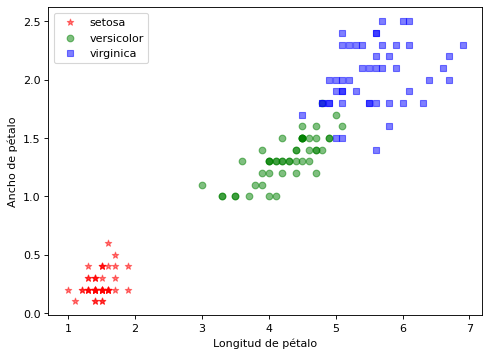

In [23]:
import matplotlib.pyplot as plt
clases = iris['target_names']
marcas = ['*', 'o', 's']
color = ['red', 'green', 'blue']
plt.figure(figsize=(7, 5), dpi=80)
for i in range(len(clases)):
    plt.scatter(X[y==i,0], X[y==i,1], c=color[i], alpha=0.5, marker=marcas[i], label=clases[i])
plt.xlabel("Longitud de pétalo")
plt.ylabel("Ancho de pétalo")
plt.legend(loc='upper left')
plt.show()

### Se ejecuta el entrenamiento


In [24]:
clf = BilayerANN(eta=0.01, n_iter=2500, random_state=1)
clf.fit(X, y)

++++++++++++++++++++
********************

### Se visualiza el acierto sobre el conjunto de entrenamiento

In [25]:
y_pred= clf.predict(X)
print('Tasa de acierto en entrenamiento (accuracy) = ', 100*y[y_pred==y].shape[0]/y.shape[0])

Tasa de acierto en entrenamiento (accuracy) =  94.66666666666667


### Finalmente se visualiza la estimación realizada

Se visualiza de forma independiente los separadores de clase basados en la matriz de pesos

In [26]:
# Dado b_i + w_i1*x + w_i2*y = 0
# y = (-1/w_i2) * (b_i + w_i1*x)
def getOrdenadaRecta(matW, matB, iNeur, max_XY, x):
    z_max_XY = matB[iNeur] + matW[iNeur,0]*max_XY[0] + matW[iNeur,1]*max_XY[1]
    sentidoRecta = '+' if z_max_XY >= 0 else '-' 
    return (-1/matW[iNeur,1])*(matB[iNeur] + matW[iNeur,0]*x), sentidoRecta

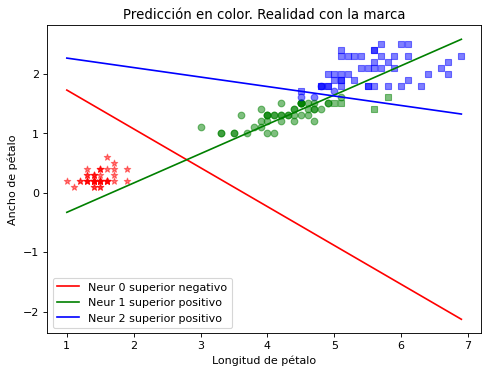

In [28]:
import matplotlib.pyplot as plt
marcas = ['*', 'o', 's']
clases=iris['target_names']
color = ['red', 'green', 'blue']
plt.figure(figsize=(7, 5), dpi=80)
lst_x = np.linspace(min(X[:,0]), max(X[:,0]), 50)
max_XY = (max(X[:,0]), max(X[:,1]))
for i in range(len(X)):
    ik = int(y_pred[i])
    ic = int(y[i])
    plt.scatter(X[i,0], X[i,1], c=color[ik], alpha=0.5, marker=marcas[ic])
## Se grafican las 3 rectas delimitadoras
for iNeur in range(3):
    lst_y, sentido = getOrdenadaRecta(clf.W_, clf.B_, iNeur, max_XY, lst_x)
    etiqueta = "Neur " + str(iNeur) + " superior positivo" if sentido == '+' else "Neur " + str(iNeur) + " superior negativo"
    plt.plot(lst_x, lst_y, c=color[iNeur], label=etiqueta)
plt.xlabel("Longitud de pétalo")
plt.ylabel("Ancho de pétalo")
plt.title("Predicción en color. Realidad con la marca")
plt.legend()
plt.show()

Se observa que las 3 clases que son __linealmente separables__.   

La recta contiene aquellas observaciones (longitud pétalo, ancho pétalo) que tienen $z=0$ en cada una de las neuronas. __La recta siempre va a delimitar a un lado los puntos positivos respecto de su ecuación en $z$ y a otro los negativos__. Pueden estar los positivos en la parte superior o inferior, como se indica en la leyenda. Esto depende de la ecuación del plano en 3D.

Por ejemplo la ecuación $z = x + y$ tiene como recta frontera $y=-x$, También $z = -x - y$ tiene la misma recta frontera al cortar con $z=0$. En 3D ambos son planos que cortan la misma recta pero su posición en el espacio es distinta. Eso hace que la primera tenga los puntos superiores positivos y la otra negativos.

### Visualización de algunas de las matrices del modelo

La matriz __X__ con los __datos de entrada__, la matriz __Z__ con la __ponderación lineal__, la matriz __A__ con la __activación final__, la matriz __Y__ con las __clases reales 'one-hote'__ .

Finalmente se incluye la matriz $\Delta$ calculada en la capa de salida y la matriz __y__ con las __clases reales en etiqueta__.

In [30]:
X.shape, clf.Z.shape, clf.A.shape, clf.Y.shape, y.shape, clf.Delta.shape

((150, 2), (150, 3), (150, 3), (150, 3), (150,), (150, 3))

In [31]:
cabe = [('Entrada','x1'),('Entrada','x2'),('Ponderación','z1'),('Ponderación','z2'),('Ponderación','z3'),
        ('Activación','a1'),('Activación','a2'),('Activación','a3'),('Salida','y1'),('Salida','y2'),('Salida','y3'),
        ('Deltas','d1'),('Deltas','d2'),('Deltas','d3')]
cabe_list = pd.MultiIndex.from_tuples(cabe)
df = pd.DataFrame(np.concatenate((X, clf.Z, clf.A, clf.Y, clf.Delta), axis=1), columns=cabe_list)
df['target']=iris['target']
df.head()

Entrada      Ponderación                     Activación                      \
       x1   x2          z1        z2        z3         a1        a2        a3   
0     1.4  0.2    3.485093 -1.142502 -8.976979   0.970261  0.241861  0.000126   
1     1.4  0.2    3.485093 -1.142502 -8.976979   0.970261  0.241861  0.000126   
2     1.3  0.2    3.665379 -1.310971 -9.048611   0.975044  0.212324  0.000118   
3     1.5  0.2    3.304807 -0.974034 -8.905347   0.964593  0.274077  0.000136   
4     1.4  0.2    3.485093 -1.142502 -8.976979   0.970261  0.241861  0.000126   

  Salida              Deltas                         target  
      y1   y2   y3        d1        d2            d3         
0    1.0  0.0  0.0 -0.000858  0.044349  1.594154e-08      0  
1    1.0  0.0  0.0 -0.000858  0.044349  1.594154e-08      0  
2    1.0  0.0  0.0 -0.000607  0.035510  1.381412e-08      0  
3    1.0  0.0  0.0 -0.001209  0.054530  1.839656e-08      0  
4    1.0  0.0  0.0 -0.000858  0.044349  1.594154e-08      0

La matriz __W__ tiene tantas __filas__ como __neuronas de salida__ y tantas __columnas__ como __neuronas de entrada__.
La matriz __B__ tiene tantas __filas__ como __neuronas de salida__.


In [32]:
clf.W_.shape, clf.B_.shape, np.unique(y).shape

((3, 2), (3,), (3,))

Para __actualizar__ en el entrenamiento las matrices __W__ y __B__ se utiliza las matrices de gradiente $\frac{\partial C}{\partial W}=\Delta^TX$ y $\frac{\partial C}{\partial B}=\Delta^T1$ que son respectivamente de igual dimensión, y a las que también se puede echar un vistazo antes de multiplicar por $\eta$

In [33]:
np.dot(clf.Delta.T, X).shape, np.sum(clf.Delta, axis=0).shape

((3, 2), (3,))

In [34]:
cabe = [('Pesos','w1'),("Pesos",'w2'),("Bias",'b'),('Gradiente Peso','w1'),('Gradiente Peso','w2'),('Gradiente Bias','b')]
cabe_list = pd.MultiIndex.from_tuples(cabe)
GB = np.sum(clf.Delta, axis=0)[:,np.newaxis]
_B = clf.B_[:,np.newaxis]

df = pd.DataFrame(np.concatenate((clf.W_, _B, np.dot(clf.Delta.T, X), GB), axis=1), columns=cabe_list)
#df.head()
df

Pesos                 Bias Gradiente Peso           Gradiente Bias
         w1        w2          b             w1        w2              b
0 -1.803011 -2.760559   6.561685       0.014828  0.020695      -0.051395
1  1.684835 -3.416968  -2.817909      -0.015193  0.031588       0.018038
2  0.716574  4.494675 -10.880400      -0.025633 -0.026701       0.169377

## Finalmente se hace una ejecución con todas las características disponibles en Iris

La dimensión de las variables de entrada será 4 en lugar de 2

In [35]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target']=iris['target']
X, y = df.values[:,0:4], df.values[:,4]
X.shape

(150, 4)

In [36]:
clf2 = BilayerANN(eta=0.01, n_iter=2500, random_state=1)
clf2.fit(X, y)

++++++++++++++++++++
********************

In [37]:
y_pred= clf2.predict(X)
print('Tasa de acierto en entrenamiento (accuracy) = ', 100*y[y_pred==y].shape[0]/y.shape[0])

Tasa de acierto en entrenamiento (accuracy) =  95.33333333333333


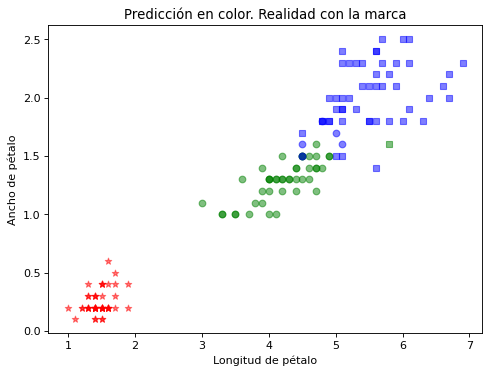

In [38]:
import matplotlib.pyplot as plt
marcas = ['*', 'o', 's']
clases=iris['target_names']
color = ['red', 'green', 'blue']
plt.figure(figsize=(7, 5), dpi=80)
for i in range(len(X)):
    ik = int(y_pred[i])
    ic = int(y[i])
    plt.scatter(X[i,2], X[i,3], c=color[ik], alpha=0.5, marker=marcas[ic])
plt.xlabel("Longitud de pétalo")
plt.ylabel("Ancho de pétalo")
plt.title("Predicción en color. Realidad con la marca")
plt.show()

## Funciones de activación

Echemos un vistazo a las funciones de activación más importantes

In [39]:
def sigmoid(x):
    #return 1.0/(1.0 + np.exp(-x))  ## versión básica con problemas de desbordamiento en valores x<<<0
    #return np.where(x < 0, np.exp(x)/(1.0 + np.exp(x)), 1.0/(1.0 + np.exp(-x)))
    #return 1. / (1. + np.exp(-np.clip(x, -250, 250)))
    from scipy.special import expit
    return expit(x)  ##Función sigmoidea de scipy; algo más lenta
 
def sigmoid_derivada(x):
    return sigmoid(x)*(1.0-sigmoid(x))
 
def tanh(x):
    return np.tanh(x)
 
def tanh_derivada(x):
    return 1.0 - np.tanh(x)**2

def ReLU(x):
    return np.maximum(0, x)

def ReLU_derivada(x):
    return np.where(x <= 0, 0, 1)

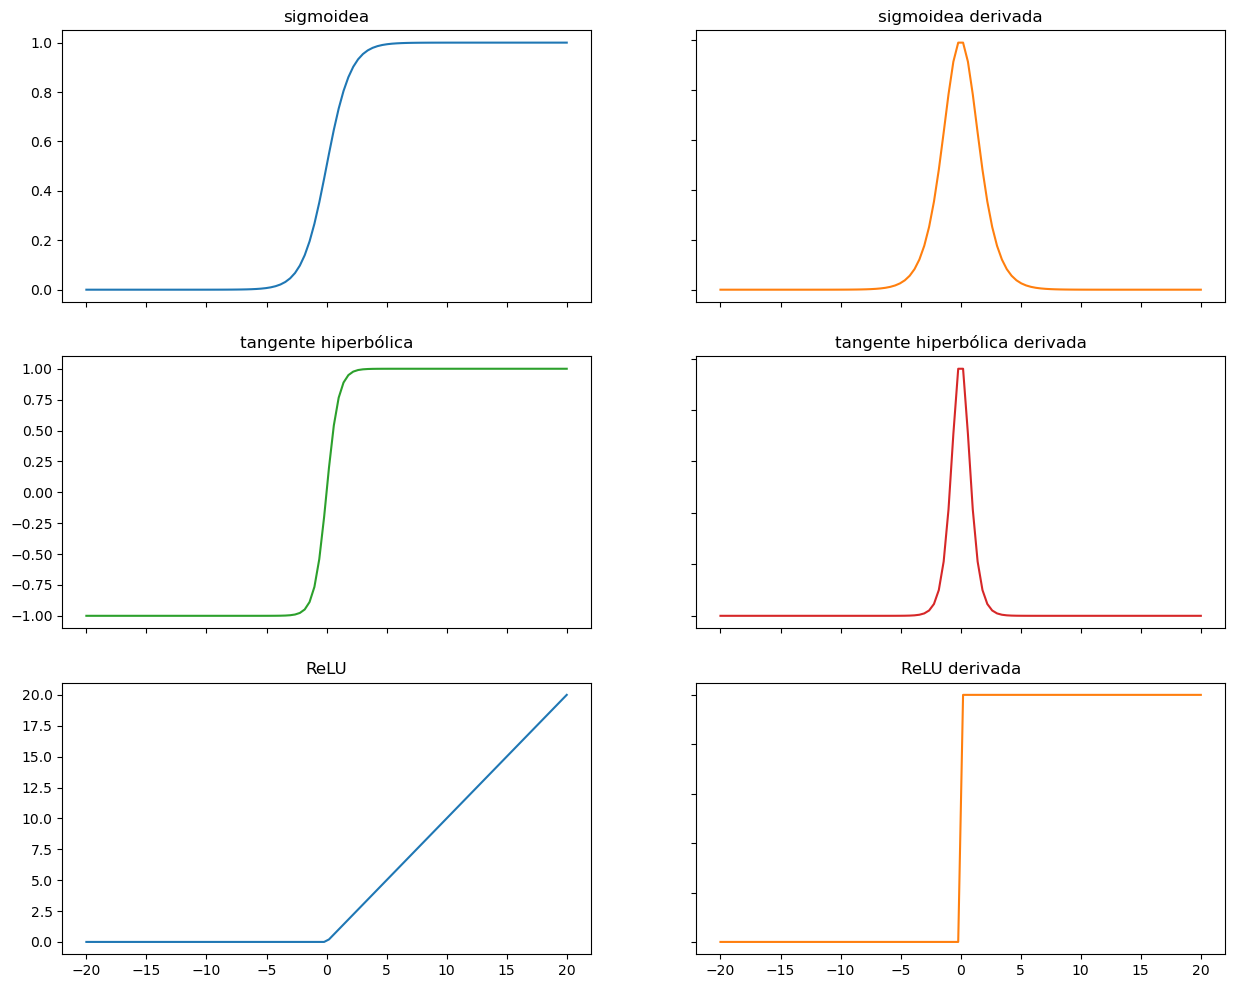

In [40]:
fig, axs = plt.subplots(3, 2, figsize=(15, 12))
x = np.linspace(-20, 20, 100)
axs[0][0].plot(x, sigmoid(x))
axs[0][0].set_title("sigmoidea")
axs[0][1].plot(x, sigmoid_derivada(x), 'tab:orange')
axs[0][1].set_title("sigmoidea derivada")
axs[1][0].plot(x, tanh(x), 'tab:green')
axs[1][0].set_title("tangente hiperbólica")
axs[1][1].plot(x, tanh_derivada(x), 'tab:red')
axs[1][1].set_title("tangente hiperbólica derivada")
axs[2][0].plot(x, ReLU(x))
axs[2][0].set_title("ReLU")
axs[2][1].plot(x, ReLU_derivada(x), 'tab:orange')
axs[2][1].set_title("ReLU derivada")

for ax in fig.get_axes():
    ax.label_outer()

__La función sigmoidea o logística__:

- Satura y anula el gradiente.
- Lenta convergencia.
- No esta centrada en el cero.
- Esta acotada entre 0 y 1.
- Buen rendimiento en la última capa.

__La función tangente hiperbólica__ es muy similar a la sigmoidea:

- Satura y anula el gradiente.
- Lenta convergencia.
- Centrada en 0.
- Esta acotada entre -1 y 1.
- Se utiliza para clasificaciones binarias.
- Buen desempeño en redes recurrentes (que se utilizan para analizar series temporales).

__La función ReLU (Rectified Lineal Unit)__:

- Solo se activa si son positivos.
- No está acotada.
- Puede anular demasiadas neuronas.
- Se comporta bien con imágenes.
- Buen desempeño en redes convolucionales

Otra función de activación muy utilizada es __Softmax__ que transforma las salidas a una representación __en forma de probabilidades__, de tal manera que el sumatorio de todas las probabilidades de las salidas de 1. Se utiliza para para __normalizar tipos multiclase__.

## Implementación del modelo bicapa en sk-learn

El modelo bicapa se encuentra implementado en la clase __sklearn.linear_model.Perceptron__. 

El __constructor__ de la clase, por ejemplo, los siguientes __parámetros__:

- __penalty__ {‘l2’,’l1’,’elasticnet’}, (por defecto=None). Son los coeficientes de regularización __Lasso (L1)__ o $\lambda|w|$, __Ridge (L2) o $\lambda w^2$__ y __Elastic Net__ (L1 + L2). Es una manera de evitar el sobreajuste (overfitting) penalizando los altos valores de los coeficientes de regresión.
- __alpha__ : ratio de aprendizaje (por defecto 0.0001).
- __fit_intercept__ : (por defecto=True). Indica si se debe calcular el bias o ha de ser cero (datos centrados).
- __max_iter__ : (por defecto=1000). Número de épocas.
- __random_state__: (por defecto=None). Semilla random.
- __tol__: (por defecto 1e-3). Criterio de parada. Si no es None termina cuando __coste - coste_previo < tol__.

Algunos de las __propiedades__ que se pueden consultar una vez creado el objeto con el constructor y realizado el ajuste son:

- <b>coef_</b>, <b>intercept_</b>: pesos y bias.

Y los __métodos__ más importantes son:

- <b>fit</b>(X, y) : realiza el ajuste.
- <b>predict</b>(X): realiza la predicción
- <b>score</b>(X, y) : devuelve la exactitud o accuracy.


In [41]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target']=iris['target']
X, y = df.values[:,0:4], df.values[:,4]

In [42]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=None, max_iter=300, alpha=0.01, random_state=1)
clf.fit(X,y)
print('Tasa de acierto en entrenamiento (accuracy) = ', 100*clf.score(X,y))

Tasa de acierto en entrenamiento (accuracy) =  94.66666666666667
